# 1- Import Packages and classes 

In [234]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import os
import re

# 2- Read DataSet

In [235]:
df = pd.read_csv('Salaries.csv')
df

c:\Users\MEGASTORE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


# 3- EDA

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [237]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

- we discover nulls in 4 cols `BasePay` , `Benefits`, `Notes`, `Status` 

- we can drop not important cols for Nulls with `Label` and fix important 

In [238]:
correlation = df.corr()

In [239]:
df.duplicated().sum()

0

- No Duplicates in Data .

In [240]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [241]:
df.corr()

,Id,TotalPay,TotalPayBenefits,Year,Notes
Id,1.000000,-0.211478,-0.092190,0.968171,NaN
TotalPay,-0.211478,1.000000,0.977313,0.032090,NaN
TotalPayBenefits,-0.092190,0.977313,1.000000,0.151947,NaN
Year,0.968171,0.032090,0.151947,1.000000,NaN
Notes,NaN,NaN,NaN,NaN,NaN


In [242]:
df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [243]:
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')

In [244]:
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 14.7+ MB


### -  Discover OutlIers By BoxPlot

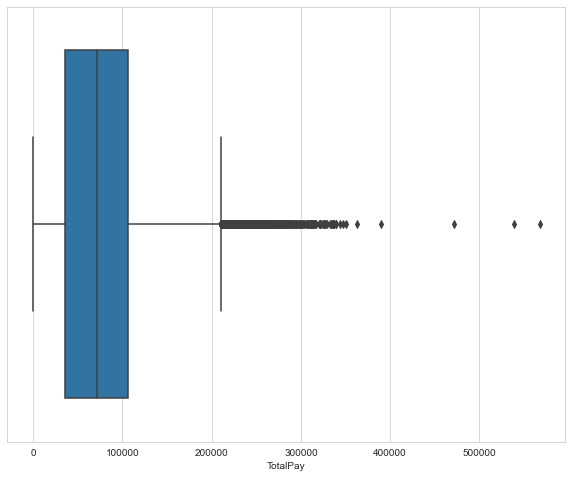

In [246]:
plt.figure(figsize=(10,8))
sns.boxplot(x='TotalPay', data=df)
plt.show()

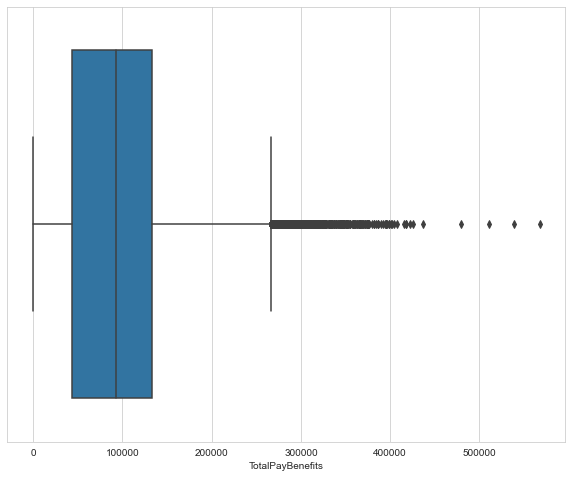

In [247]:
plt.figure(figsize=(10,8))
sns.boxplot(x='TotalPayBenefits', data=df)
plt.show()

- - we can fix outliers by Robust Scaler

(array([2.6750e+04, 1.0992e+04, 1.5289e+04, 2.6648e+04, 2.1496e+04,
        1.5247e+04, 1.2117e+04, 8.4120e+03, 5.2600e+03, 3.3290e+03,
        1.6860e+03, 7.5400e+02, 3.4500e+02, 1.4700e+02, 7.4000e+01,
        5.0000e+01, 2.9000e+01, 2.1000e+01, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  -618.13 ,  18322.322,  37262.774,  56203.226,  75143.678,
         94084.13 , 113024.582, 131965.034, 150905.486, 169845.938,
        188786.39 , 207726.842, 226667.294, 245607.746, 264548.198,
        283488.65 , 302429.102, 321369.554, 340310.006, 359250.458,
        378190.91 , 397131.362, 416071.814, 435012.266, 453952.718,
        472893.17 , 491833.622, 510774.074, 529714.526, 548654.978,
        567595.43 ]),
 <BarContainer object of 30 artists>)

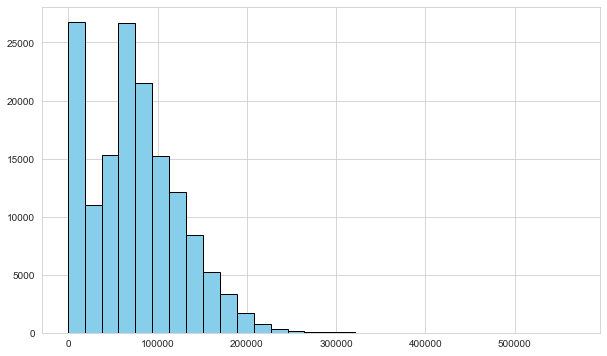

In [248]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], 
         bins=30, 
         color='skyblue', edgecolor='black')

Text(0.5, 0, 'OvertimePay')

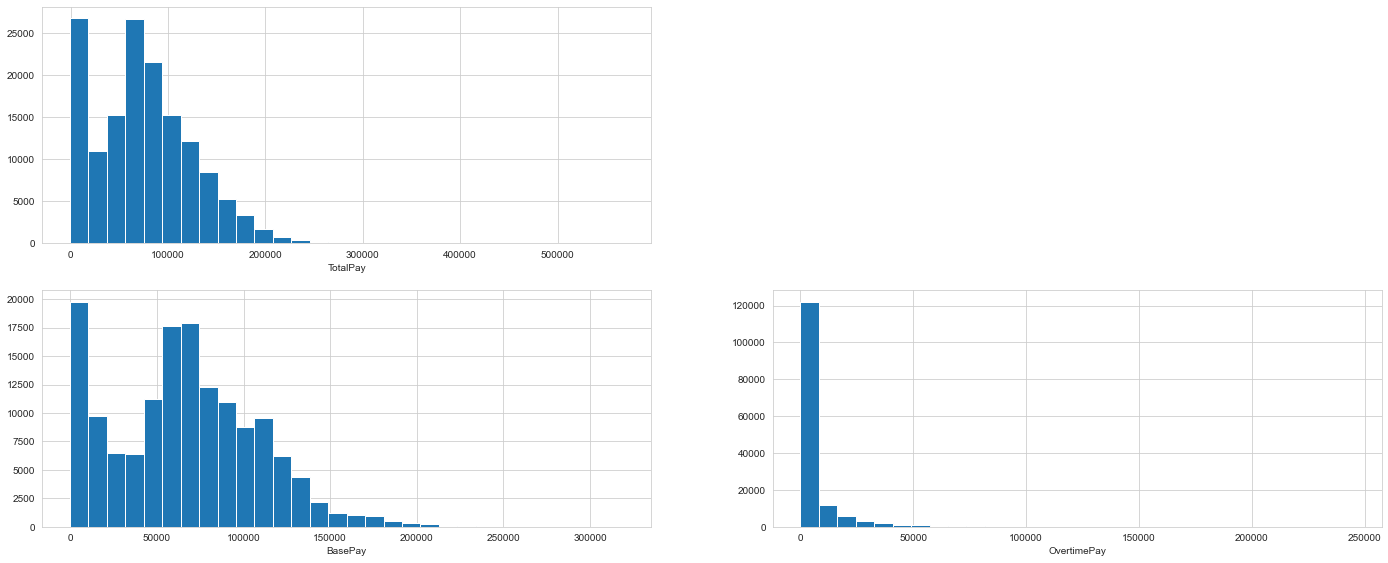

In [249]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 3)
fig = df['TotalPay'].hist(bins=30)
fig.set_xlabel('TotalPay')


plt.subplot(4, 2, 5)
fig = df['BasePay'].hist(bins=30)
fig.set_xlabel('BasePay')


plt.subplot(4, 2, 6)
fig = df['OvertimePay'].hist(bins=30)
fig.set_xlabel('OvertimePay')

we can see there variables are skewed , fix it by ROBUST also

In [250]:
df.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109489
OvertimePay          65998
OtherPay             84968
Benefits             99635
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64

- discover Label

In [251]:
df['TotalPayBenefits'].value_counts()

 7959.18      263
 123290.70     56
 132242.50     49
 26058.70      43
 105489.00     42
             ... 
 117919.21      1
 117919.44      1
 117927.83      1
 117932.36      1
-618.13         1
Name: TotalPayBenefits, Length: 142098, dtype: int64

i think Data is imbalanced , we can fix it By SMOTE

- Best columns with Target 

In [252]:
correlation['TotalPayBenefits'].sort_values(ascending=False)

TotalPayBenefits    1.000000
TotalPay            0.977313
Year                0.151947
Id                 -0.092190
Notes                    NaN
Name: TotalPayBenefits, dtype: float64

we can drop `Base pay` , `year` , `job_title_length`  , `Id` , `Notes`

# Analytics 

### what is the average BasePay

In [253]:
df['BasePay'].median()  # (median) because this column contain outliers

65007.45

### whatis the highest amount of OvertimePay in data

In [254]:
df['OvertimePay'].max()

245131.88

### what is the job title of joseph driscoll?

In [255]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

### how much does joseph make (including benefits)

In [256]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

### what is the name of lowest paid person (including benefits)? 

In [257]:
min_salary_index = df['TotalPayBenefits'].idxmin()
print(min_salary_index)
lowest_paid_name = df.loc[min_salary_index, 'EmployeeName']
print(lowest_paid_name)

148653
Joe Lopez


In [258]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


- joe lopez is the lowset paid person

### what was the average BasePay of all employees per year ? (2011 - 2014)

In [259]:
filtering_avg = df[(df['Year'] >= 2011) & (df['Year'] <= 2014)]

In [260]:
filtering_avg.groupby('Year')['BasePay'].median()

Year
2011    62871.72
2012    64017.37
2013    67669.00
2014    65055.00
Name: BasePay, dtype: float64

### how many unique job titles are there 

In [261]:
df['JobTitle'].nunique()

2159

### what are the top 5 common jobs ?

In [262]:
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

### how many job titles were represented by only one person in 2013? 

In [263]:
(df[df['Year'] == 2013]['JobTitle'].value_counts() == 1).sum()

202

### how many people have the word chief in thier job title ? 

In [264]:
chief_df = df[df['JobTitle'].str.contains(r'\bchief\b',regex=True, case=False)]
chief_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [265]:
chief_df['JobTitle'].count()

627

### is there a correlation between length of the job title string and salary

In [266]:
df['job_title_length'] = df['JobTitle'].apply(len)
df['job_title_length']

0         46
1         31
2         31
3         36
4         44
          ..
148649     9
148650    12
148651    12
148652    12
148653    26
Name: job_title_length, Length: 148654, dtype: int64

In [267]:
df[['job_title_length', 'TotalPayBenefits']].corr()

,job_title_length,TotalPayBenefits
job_title_length,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


- no correlation between them

__________________________

# 4- PreProcessing

### 1- We Can Fix Nulls From Data

In [268]:
total_nulls = df.isnull().sum()
percent_nulls = (total_nulls/df.isnull().count()*100)

nulls_in_data = pd.DataFrame({'Total_Nulls':total_nulls, '% nulls':percent_nulls})
nulls_in_data.sort_values(by='Total_Nulls', ascending=False)

,Total_Nulls,% nulls
Notes,148654,100.000000
Status,110535,74.357232
Benefits,36159,24.324270
BasePay,609,0.409676
OvertimePay,4,0.002691
Id,0,0.000000
EmployeeName,0,0.000000
JobTitle,0,0.000000
OtherPay,0,0.000000
TotalPay,0,0.000000


remove `Notes` 

In [269]:
df.drop(columns='Notes', inplace=True)

fix `Status` , `Benefits` , `BasePay` , and `OvertimePay` with Midean and Mode for object cols

In [270]:
Mode_Status = df['Status'].mode()[0]
Mode_Status

'FT'

In [271]:
df['Status'].fillna(Mode_Status, inplace=True)

In [272]:
df['Benefits'].value_counts()

0.0         1053
0.00         681
7959.18      348
4659.36      107
25699.2       83
            ... 
584.59         1
593.24         1
611.06         1
606.03         1
29421.67       1
Name: Benefits, Length: 99635, dtype: int64

In [273]:
df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce')

In [274]:
Median_Benefits = df['Benefits'].median()
Median_Benefits

28628.62

In [275]:
df['Benefits'].fillna(Median_Benefits, inplace=True)

In [276]:
df['BasePay'].value_counts()

0.00        1298
54703.00     338
55026.00     297
48472.40     210
65448.00     153
            ... 
65402.73       1
68818.72       1
73810.54       1
56242.68       1
15.50          1
Name: BasePay, Length: 109489, dtype: int64

In [277]:
Median_BasePay = df['BasePay'].median()
Median_BasePay

65007.45

In [278]:
df['BasePay'].fillna(Median_BasePay, inplace=True)

In [279]:
df['OvertimePay'].value_counts()

0.00        77321
681.23         41
10.68          41
152.13         38
1314.78        27
            ...  
30132.07        1
22953.71        1
4301.91         1
9311.49         1
56.77           1
Name: OvertimePay, Length: 65998, dtype: int64

In [280]:
df[df['OvertimePay'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,job_title_length
148646,148647,Not provided,Not provided,65007.45,NaN,Not Provided,28628.62,0.0,0.0,2014,San Francisco,FT,12
148650,148651,Not provided,Not provided,65007.45,NaN,Not Provided,28628.62,0.0,0.0,2014,San Francisco,FT,12
148651,148652,Not provided,Not provided,65007.45,NaN,Not Provided,28628.62,0.0,0.0,2014,San Francisco,FT,12
148652,148653,Not provided,Not provided,65007.45,NaN,Not Provided,28628.62,0.0,0.0,2014,San Francisco,FT,12


In [281]:
Median_OvertimePay = df['OvertimePay'].median()
Median_OvertimePay

0.0

In [282]:
df['OvertimePay'].fillna(Median_OvertimePay, inplace=True)

In [283]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
job_title_length    0
dtype: int64

- we fix all nulls in data with suitable values 

### 2- Fix Dtypes in Data

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
 11  Status            148654 non-null  object 
 12  job_title_length  148654 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 14.7+ MB


i will drop `EmployeeName` , `Id` and `JobTitle` to fit a good model because in this columns more unique

In [285]:
df[df['OtherPay'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,job_title_length


change obj to float 

In [286]:
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')

### 3- Treat Outliers in DataSet

In [287]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,job_title_length
count,148654.000000,148654.000000,148654.000000,148650.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66320.049313,5065.923568,3648.767297,25888.705945,74768.321972,93692.554811,2012.522643,19.131749
std,42912.857795,42677.029781,11454.256594,8056.601866,13488.172930,50517.005274,62793.533483,1.117538,7.232820
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,4.000000
25%,37164.250000,33847.017500,0.000000,0.000000,22342.297500,36168.995000,44065.650000,2012.000000,14.000000
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,18.000000
75%,111490.750000,94605.740000,4657.632500,4236.065000,33468.980000,105839.135000,132876.450000,2014.000000,25.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,50.000000


we discoverd the Outliers in cols : `TotalPay` , `OvertimePay` , `BasePay` , `OtherPay` , `Benefits` , `TotalPayBenefits`

IQR

In [288]:
def detect_outliers_iqr_and_Treat(DataFrame,Feature):
    outliers = []
    
    df = sorted(DataFrame[Feature])
    print("Feature name is ",Feature)
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    # print(q1, q3)
    IQR = q3-q1
    lower_limit = q1-(1.5*IQR)
    upper_limit = q3+(1.5*IQR)
    print('lower limit: ', lower_limit)
    print('upper limit: ', upper_limit)
    print('IQR:' , IQR)
    
    for i in df: 
        if ((i<lower_limit) or (i>upper_limit)):
            outliers.append(i)
    if len(outliers)>0:        
        print("Outliers from IQR method: ", outliers[:5])

        #Capping  
        DataFrame_c = DataFrame
        DataFrame_c[Feature] = np.where(DataFrame_c[Feature]>upper_limit, upper_limit , DataFrame_c[Feature]) 
        DataFrame_c[Feature] = np.where(DataFrame_c[Feature]<lower_limit , lower_limit , DataFrame_c[Feature])

        #compare
        plt.figure(figsize=(15,5))

        plt.subplot(2,2,1)
        sns.displot(DataFrame[Feature])

        plt.subplot(2,2,2)
        sns.boxplot(DataFrame[Feature])

        plt.subplot(2,2,3)
        sns.displot(DataFrame_c[Feature])

        plt.subplot(2,2,4)
        sns.boxplot(DataFrame_c[Feature])
        plt.show()
        
        return outliers,DataFrame_c# Driver code
    else:
        print("This feature has no Outliers from IQR method")
        return outliers,DataFrame# Driver code


_________________________________________________________________________________________
Feature name is  TotalPay
lower limit:  -68336.21499999997
upper limit:  210344.34499999997
IQR: 69670.13999999998
Outliers from IQR method:  [210397.99, 210404.57, 210424.71, 210440.52, 210464.47]


c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


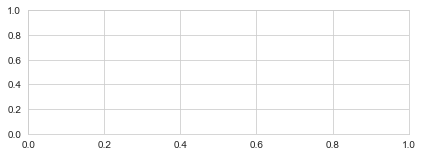

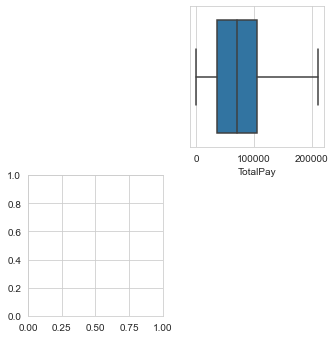

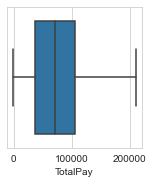

_________________________________________________________________________________________
Feature name is  BasePay
lower limit:  -57291.06625
upper limit:  185743.82375
IQR: 60758.7225
Outliers from IQR method:  [185783.9, 185791.57, 185827.33, 185833.37, 185858.76]


c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


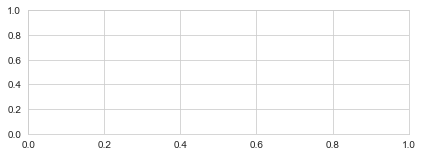

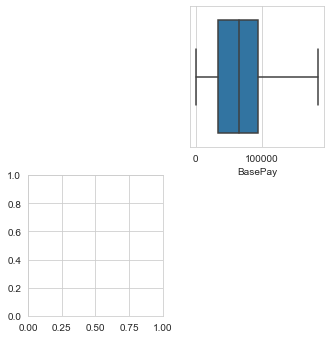

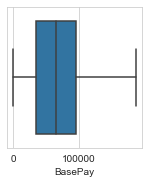

_________________________________________________________________________________________
Feature name is  Benefits
lower limit:  5652.273749999997
upper limit:  50159.00375
IQR: 11126.682500000003
Outliers from IQR method:  [-33.89, -13.8, -8.2, -2.73, 0.0]


c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


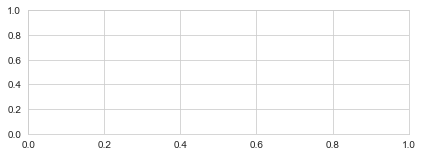

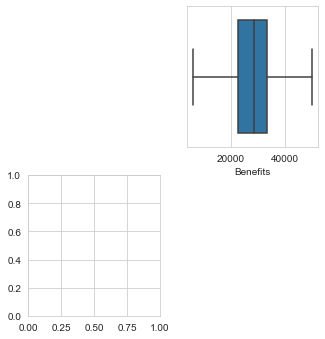

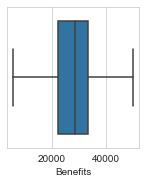

_________________________________________________________________________________________
Feature name is  OvertimePay
lower limit:  -6986.44875
upper limit:  11644.08125
IQR: 4657.6325
Outliers from IQR method:  [11645.47, 11645.63, 11645.7, 11645.88, 11646.15]


c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


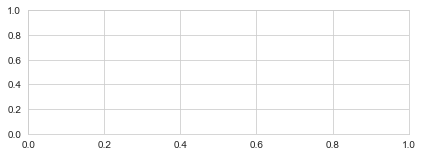

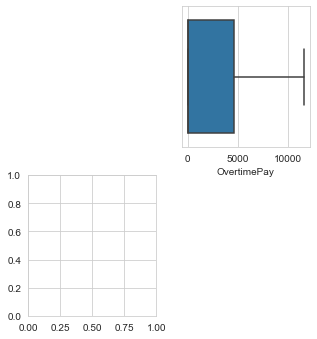

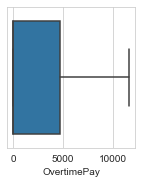

In [289]:
Personal_df_processed_new = df.copy()
outliers_dict_Personal = {}

cols_to_check = ['TotalPay','BasePay','Benefits','OvertimePay']
for col in cols_to_check:
    print("_________________________________________________________________________________________")
    outliers,Personal_df_processed_new = detect_outliers_iqr_and_Treat(df,col)
    outliers_dict_Personal[col+"_outliers"]=outliers


In [290]:
df.shape

(148654, 13)

In [291]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,job_title_length
count,148654.000000,148654.000000,148654.000000,148650.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66169.774737,2848.479807,3648.767297,26483.767108,74531.904480,93692.554811,2012.522643,19.131749
std,42912.857795,42169.903458,4292.229087,8056.601866,11832.205958,49730.228595,62793.533483,1.117538,7.232820
min,1.000000,-166.010000,-0.010000,-7058.590000,5652.273750,-618.130000,-618.130000,2011.000000,4.000000
25%,37164.250000,33847.017500,0.000000,0.000000,22342.297500,36168.995000,44065.650000,2012.000000,14.000000
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,18.000000
75%,111490.750000,94605.740000,4657.632500,4236.065000,33468.980000,105839.135000,132876.450000,2014.000000,25.000000
max,148654.000000,185743.823750,11644.081250,400184.250000,50159.003750,210344.345000,567595.430000,2014.000000,50.000000


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
 11  Status            148654 non-null  object 
 12  job_title_length  148654 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 14.7+ MB


In [293]:
correlation['TotalPayBenefits'].sort_values(ascending=False)

TotalPayBenefits    1.000000
TotalPay            0.977313
Year                0.151947
Id                 -0.092190
Notes                    NaN
Name: TotalPayBenefits, dtype: float64

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
 11  Status            148654 non-null  object 
 12  job_title_length  148654 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 14.7+ MB


In [295]:
df['Status'] = df['Status'].astype('category')

# 5- Visualization for Analysis 

### avg of Basepay by Year 2011 to 2014

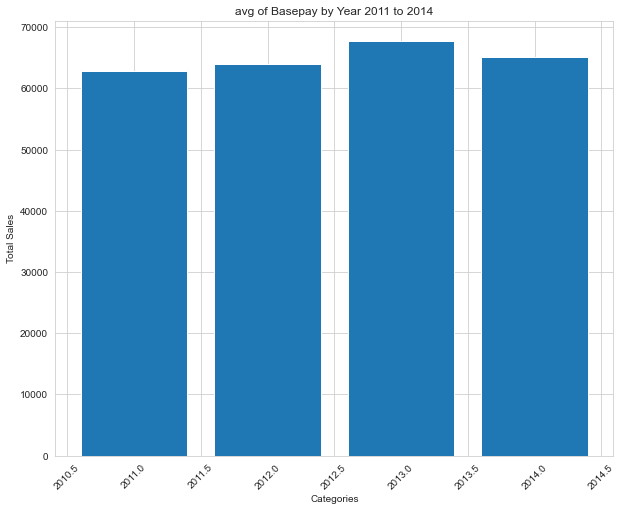

In [296]:
plt.figure(figsize=(10, 8))
avg_basepay = filtering_avg.groupby('Year')['BasePay'].median()

plt.bar(avg_basepay.index, avg_basepay.values) 

plt.xticks(rotation=45) 
plt.xlabel('Categories') 
plt.ylabel('Total Sales') 
plt.title('avg of Basepay by Year 2011 to 2014') 
plt.show()

 - best avg in (2013)

### what are top 5 jobs 

In [297]:
top_5_jobs = df['JobTitle'].value_counts().head(5)
top_5_jobs

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

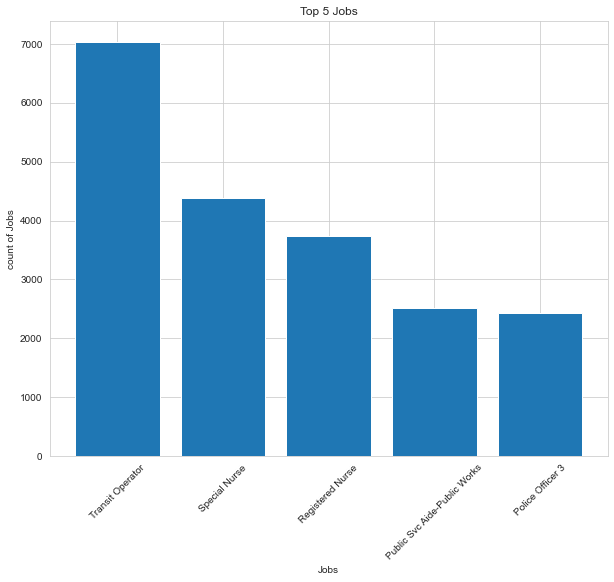

In [298]:
plt.figure(figsize=(10, 8))

plt.bar(top_5_jobs.index, top_5_jobs.values) 

plt.xticks(rotation=45) 
plt.xlabel('Jobs') 
plt.ylabel('count of Jobs') 
plt.title('Top 5 Jobs') 
plt.show()

`Transit Operator` is most Job in SF

### what is the most year had a `TotalPayBenefits` by Line Plot ?

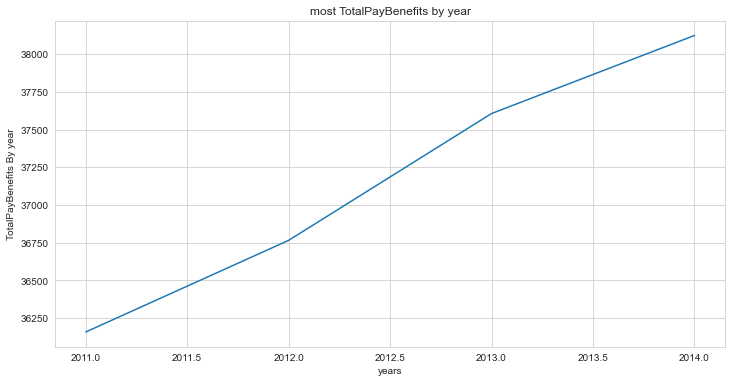

In [299]:
day_name_sales = df.groupby('Year')['TotalPayBenefits'].count()

day_name_sales.plot(kind='line', figsize=(12, 6))
plt.xlabel('years') 
plt.ylabel('TotalPayBenefits By year') 
plt.title('most TotalPayBenefits by year') 
plt.show()

### By Pie Chart

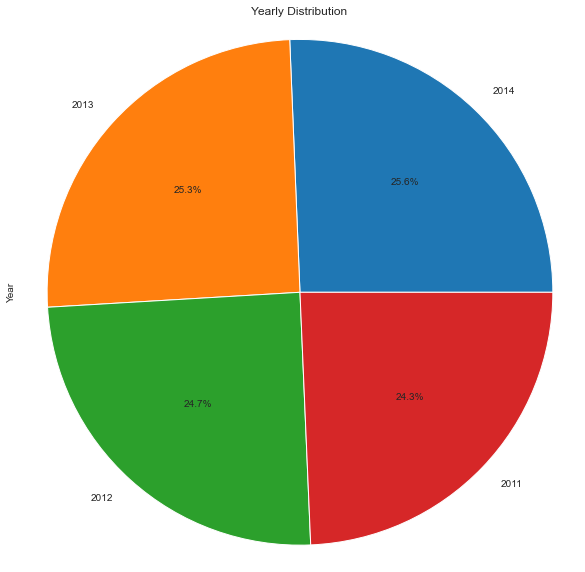

In [300]:
plt.figure(facecolor='white', figsize=(10, 10)) 
df['Year'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Yearly Distribution")
plt.axis('equal')
plt.show()

- - best totalpay benefits in 2014

### what is the distribution of `Status` ? 

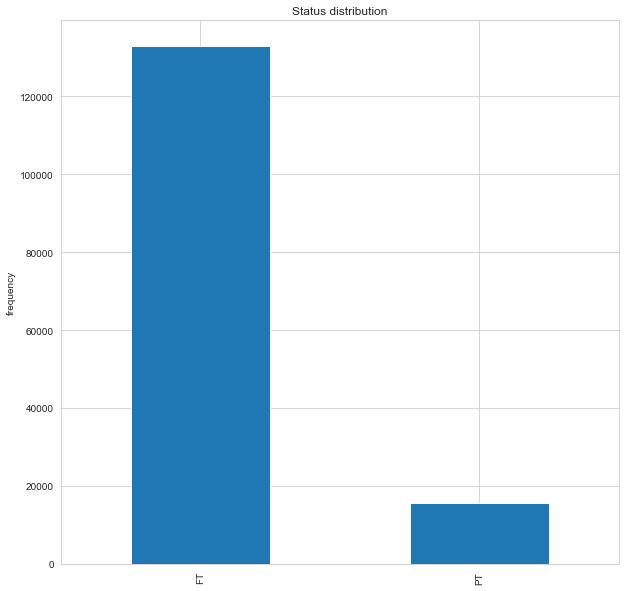

In [301]:
plt.figure(facecolor='white', figsize=(10, 10)) 
df['Status'].value_counts().plot(kind="bar")
plt.title("Status distribution")
plt.ylabel("frequency")
plt.show()

-  Mojority in (FT)

### what is the Average if every values By Year

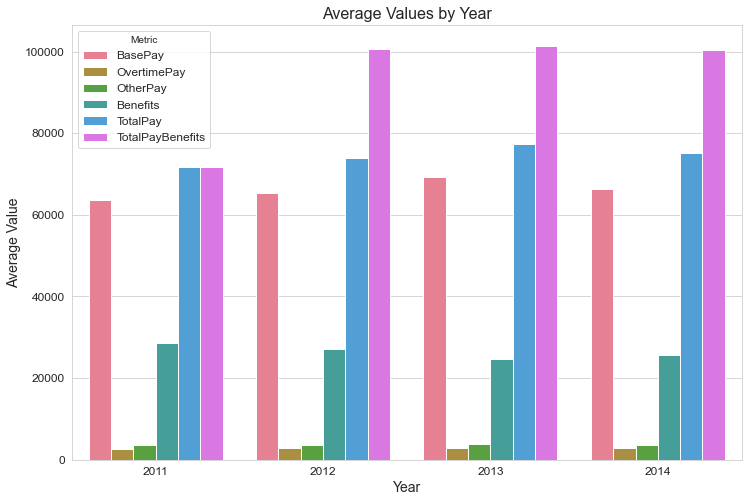

In [302]:
cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
avg_values_by_year = df.groupby('Year')[cols].mean().reset_index()
avg_values_melted = avg_values_by_year.melt(id_vars='Year', var_name='Metric', value_name='AverageValue')
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='AverageValue', hue='Metric', data=avg_values_melted, palette='husl')
plt.title('Average Values by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### correlation for every columns

<function matplotlib.pyplot.show(close=None, block=None)>

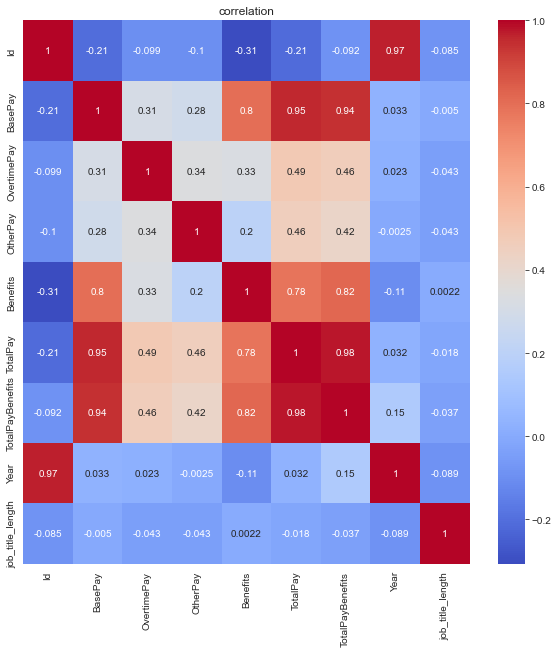

In [303]:
correlation =  df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('correlation')
plt.show

In [304]:
df.drop(columns=['Id', 'Agency', 'EmployeeName', 'JobTitle', 'Year', 'job_title_length', 'OtherPay'], inplace=True)

In [305]:
string_columns = list(df.select_dtypes(include=['category']).columns)
string_columns

['Status']

In [306]:
df1 = pd.get_dummies(df, columns=string_columns, drop_first=True) 

In [307]:
df1.head()

,BasePay,OvertimePay,Benefits,TotalPay,TotalPayBenefits,Status_PT
0,167411.18000,0.00000,28628.62,210344.345,567595.43,0
1,155966.02000,11644.08125,28628.62,210344.345,538909.28,0
2,185743.82375,11644.08125,28628.62,210344.345,335279.91,0
3,77916.00000,11644.08125,28628.62,210344.345,332343.61,0
4,134401.60000,9737.00000,28628.62,210344.345,326373.19,0


### Declare X and Y

In [308]:
X = df1.drop(columns=['TotalPayBenefits'])
y = df1['TotalPayBenefits']

In [309]:
X

,BasePay,OvertimePay,Benefits,TotalPay,Status_PT
0,167411.18000,0.00000,28628.62000,210344.345,0
1,155966.02000,11644.08125,28628.62000,210344.345,0
2,185743.82375,11644.08125,28628.62000,210344.345,0
3,77916.00000,11644.08125,28628.62000,210344.345,0
4,134401.60000,9737.00000,28628.62000,210344.345,0
...,...,...,...,...,...
148649,0.00000,0.00000,5652.27375,0.000,1
148650,65007.45000,0.00000,28628.62000,0.000,0
148651,65007.45000,0.00000,28628.62000,0.000,0
148652,65007.45000,0.00000,28628.62000,0.000,0


In [310]:
X.describe()

,BasePay,OvertimePay,Benefits,TotalPay,Status_PT
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,66169.774737,2848.479807,26483.767108,74531.904480,0.106186
std,42169.903458,4292.229087,11832.205958,49730.228595,0.308077
min,-166.010000,-0.010000,5652.273750,-618.130000,0.000000
25%,33847.017500,0.000000,22342.297500,36168.995000,0.000000
50%,65007.450000,0.000000,28628.620000,71426.610000,0.000000
75%,94605.740000,4657.632500,33468.980000,105839.135000,0.000000
max,185743.823750,11644.081250,50159.003750,210344.345000,1.000000


### Train and Test Split

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [312]:
y

0         567595.43
1         538909.28
2         335279.91
3         332343.61
4         326373.19
            ...    
148649         0.00
148650         0.00
148651         0.00
148652         0.00
148653      -618.13
Name: TotalPayBenefits, Length: 148654, dtype: float64

In [313]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# x_test = scaler.transform(X_test)

In [314]:
# over_sampling = SMOTE(random_state=2024)
# os_x , os_y = over_sampling.fit_resample(X_train, y_train)

In [315]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [316]:
r_seq = regressor.score(X_train, y_train)
r_seq

0.9606924455099609

In [317]:
y_pred = regressor.predict(X_test)
y_pred

array([28137.23195199, 58545.54817678,  3992.71717887, ...,
       93008.06089572, 94746.41001628, 76728.77368935])

In [318]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of determination:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 9818.279649652417
Mean Squared Error: 149169487.9066459
Root Mean Squared Error 12213.496137742293
Coefficient of determination: 0.961570893778125
